In [4]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import theano.tensor as tt

In [2]:
data = pd.read_table(pm.get_data('efron-morris-75-data.tsv'), sep="\t")
at_bats, hits = data[['At-Bats', 'Hits']].values.T

In [3]:
data

,FirstName,LastName,At-Bats,Hits,BattingAverage,RemainingAt-Bats,RemainingAverage,SeasonAt-Bats,SeasonHits,SeasonAverage
0,Roberto,Clemente,45,18,0.400,367,0.3460,412,145,0.352
1,Frank,Robinson,45,17,0.378,426,0.2981,471,144,0.306
2,Frank,Howard,45,16,0.356,521,0.2764,566,160,0.283
3,Jay,Johnstone,45,15,0.333,275,0.2218,320,76,0.238
4,Ken,Berry,45,14,0.311,418,0.2727,463,128,0.276
5,Jim,Spencer,45,14,0.311,466,0.2704,511,140,0.274
6,Don,Kessinger,45,13,0.289,586,0.2645,631,168,0.266
7,Luis,Alvarado,45,12,0.267,138,0.2101,183,41,0.224
8,Ron,Santo,45,11,0.244,510,0.2686,555,148,0.267
9,Ron,Swaboda,45,11,0.244,200,0.2300,245,57,0.233


In [5]:
N = len(hits)

with pm.Model() as baseball_model:

    phi = pm.Uniform('phi', lower=0.0, upper=1.0)

    kappa_log = pm.Exponential('kappa_log', lam=1.5)
    kappa = pm.Deterministic('kappa', tt.exp(kappa_log))

    thetas = pm.Beta('thetas', alpha=phi*kappa, beta=(1.0-phi)*kappa, shape=N)
    y = pm.Binomial('y', n=at_bats, p=thetas, observed=hits)

In [6]:
baseball_model

In [7]:
with baseball_model:

    theta_new = pm.Beta('theta_new', alpha=phi*kappa, beta=(1.0-phi)*kappa)
    y_new = pm.Binomial('y_new', n=4, p=theta_new, observed=0)

In [8]:
baseball_model

In [9]:
with baseball_model:
    trace = pm.sample(2000, tune=1000, nchains=2,
                      nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/claus/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_new_logodds__, thetas_logodds__, kappa_log_log__, phi_interval__]
100%|██████████| 3000/3000 [00:26<00:00, 113.11it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


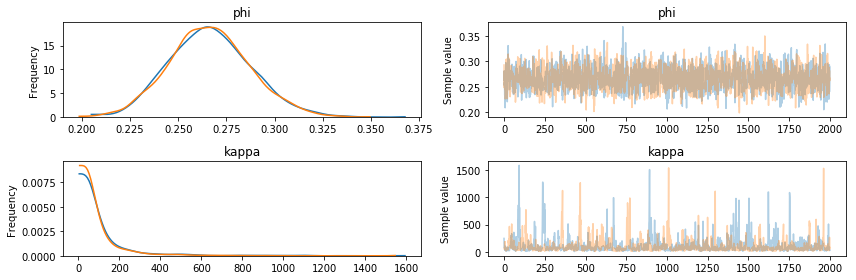

In [10]:
pm.traceplot(trace, varnames=['phi', 'kappa']);

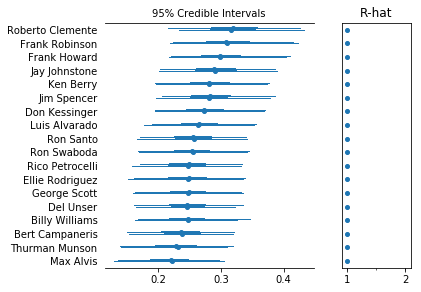

In [11]:
player_names = data.apply(lambda x: x.FirstName + ' ' + x.LastName, axis=1)
pm.forestplot(trace, varnames=['thetas'], ylabels=player_names)